# Data Resampling Techniques👨🏻‍💻 #
---

### Agenda
- [Resampling](#Resampling)
    - UnderSampling
    - OverSampling
- [Resampling on synthetic data](#Synthetic)
    - [UnderSampling Techniques](#UnderSampling)
    - [OverSampling Techniques](#OverSampling)
    - [Undersampling and Oversampling combination Techniques](#Combination)
- [Resampling on Real data](#Real)


## <a id='Resampling'></a> Resampling
<img src="imgs/resampling.png">

Weaknesses:
- The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting.
- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

In [1]:
!pip install scikit-learn
!pip install imbalanced-learn

---
### <a id='lib'></a> Libraries 📕📗📘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTETomek, SMOTEENN

##  <a id='Synthetic'></a> Resampling on synthetic data
Let's create some imbalanced data to demonstrate the differene between resampling methods.

In [10]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=3,
                           n_clusters_per_class=1,
                           weights=[0.06, 0.02, 0.92],
                           class_sep=0.8, random_state=0)
data = [X, y]
X.size

2000

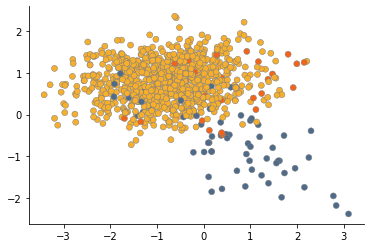

In [3]:


colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y]
fig = plt.Figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=colors, edgecolors='grey', linewidths=0.5)
sns.despine()

##  <a id='UnderSampling'></a> UnderSampling Techniques 
---

### Random Undersampling
First, let's try the most naive approach - random undersampling. This will delete random of major class samples.

Text(0.5, 1.0, 'Random Undersampling')

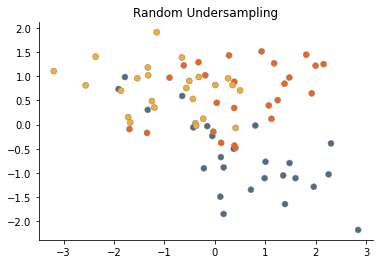

In [9]:
rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Random Undersampling")

### NearMiss Undersampling
Another undersampling method - Near Miss - deletes the major class samples for which the average distance to the N closest samples of the minor class is the smallest.

Text(0.5, 1.0, 'Near Miiss')

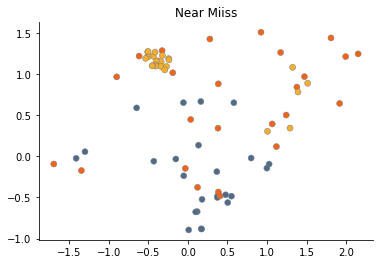

In [16]:
rus = NearMiss()
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Near Miiss")

### Tomek links (Under-Sampling the Majority Class)

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

Text(0.5, 1.0, 'TomekLinks')

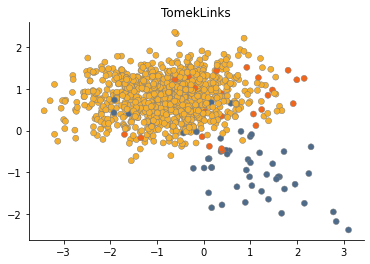

In [30]:
rus = TomekLinks()
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("TomekLinks")


### EditedNearestNeighbours Undersampling
The algorithm allows you to remove points which contain a majority of points not in the same class as the point under consideration. Alternatively, and even more strictly, you may choose to remove points containing at least one neighor not in the neighborhood.

Text(0.5, 1.0, 'Edited Nearest Neighbours $kind=all, k=3$, $\\Delta n =-155$')

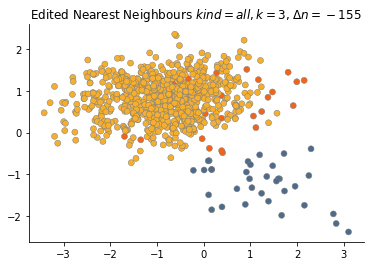

In [22]:
rus = EditedNearestNeighbours()
rus.fit(X, y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]

plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Edited Nearest Neighbours $kind=all, k=3$, $\Delta n =-155$")


##  <a id='OverSampling'></a> OverSampling Techniques
---

### Random Oversampling
let's try the most naive approach - random oversampling. This will create a duplicate samples of a minor class.

Text(0.5, 1.0, 'Random Oversampling')

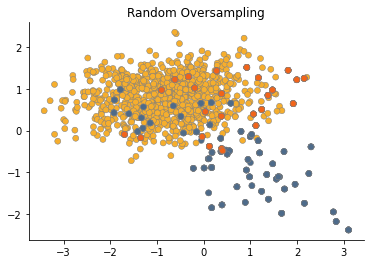

In [8]:
ros = RandomOverSampler(random_state=0, sampling_strategy={0: 300, 1: 300})
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("Random Oversampling")

### SMOTE
A more advanced method - SMOTE (Synthetic Minority Oversampling Technique) - doesn't just duplicate an existing sample. SMOTE generates a new sample considering its k neareast-neighbors.

**Steps samples are created using Smote:**
- Identify the feature vector and its nearest neighbor
- Compute the distance between the two sample points
- Multiply the distance with a random number between 0 and 1.
- Identify a new point on the line segment at the computed distance.
- Repeat the process for identified feature vectors.

<img src="imgs/smote.jpeg">

Text(0.5, 1.0, 'SMOTE')

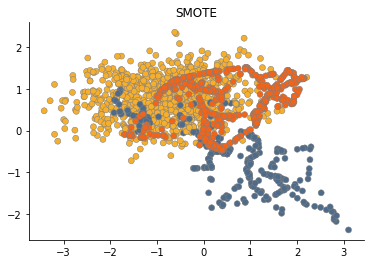

In [9]:
smote = SMOTE(random_state=0,  sampling_strategy={0: 300, 1: 500})
smote.fit(X, y)
X_resampled, y_resampled = smote.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTE")

The plot shows that SMOTE generates many "noisy" samples that are placed between the outliers and the true minor samples.

To solve this problem, one may use any of **"cleaning"** undersampling methods. 


##  <a id='Combination'></a> Undersampling and Oversampling combination Techniques
---
### SMOTEENN

For instance, `SMOTEEN` **(SMOTE + Edited Nearest Neighbours)** generates new samples as a `vanila SMOTE`, but then deletes those which class is different from the k-nearest neighbours' class.

Text(0.5, 1.0, 'SMOTEEEN')

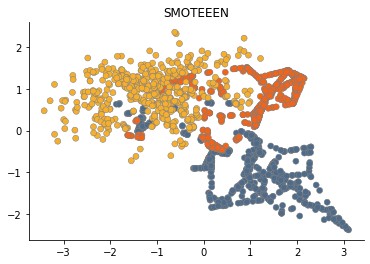

In [6]:
smote = SMOTEENN(random_state=0)
smote.fit(X, y)
X_resampled, y_resampled = smote.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTEEEN")

### SMOTETomek
`SMOTETomek` **(SMOTE + Tomek Links )** technique, This method does a combination of over-sampling and under-sampling.
- Generate new samples with SMOTE.
- Delete objects that create Tomek's link. A Tomek’s link exist if the two samples are the nearest neighbors of each other.

Text(0.5, 1.0, 'SMOTETomek')

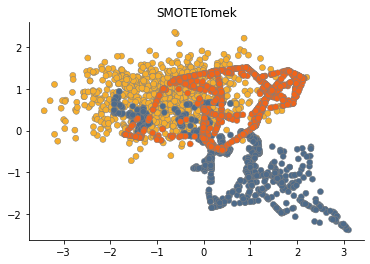

In [37]:
smt = SMOTETomek(sampling_strategy='auto')
smt.fit(X, y)
X_resampled, y_resampled = smt.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTETomek")

### Smote-NC:
Smote oversampling technique only works for the dataset with all **continuous features**. For a dataset with **categorical features**, we have a variation of Smote, which is `Smote-NC` (Nominal and Continuous).

Text(0.5, 1.0, 'SMOTENC')

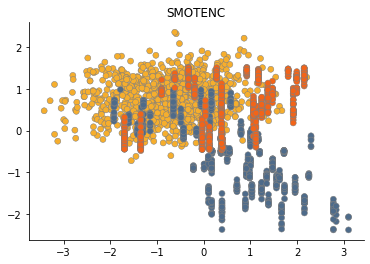

In [54]:
rus = SMOTENC(random_state=42, categorical_features=[0])
rus.fit(X,y)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#4E6B8A' if v == 0 else '#F26419' if v == 1 else '#F6AE2D' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='grey')
sns.despine()
plt.title("SMOTENC")

##  <a id='Real'></a> Resampling on real data
---
Now that we have a basic idea how different resampling approaches work, let's try to apply this knowledge in a real classification task. We are provided with the information about the results of a bank marketing campaign. 

### `Data Exploration`

In [63]:
bank = pd.read_csv('./data/bank-full.csv')
bank.shape

(45211, 17)

no     39922
yes     5289
Name: y, dtype: int64

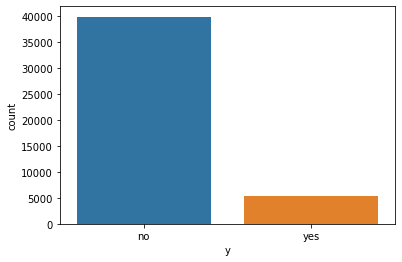

In [66]:
sns.countplot(x="y", data=bank)
bank.y.value_counts()

**It's clear that the data is imbalanced. There is much more information on people who declined to sign a deposit.**

In [62]:
# Let's take a look on a few samples in our dataset.
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**As we can see, there are some categorical features that need to be encoded.**

In [67]:
bank["default"] = bank["default"].map({"no":0,"yes":1})

bank["housing"] = bank["housing"].map({"no":0,"yes":1})

bank["loan"] = bank["loan"].map({"no":0,"yes":1})

bank["y"] = bank["y"].map({"no":0,"yes":1})

bank.education = bank.education.map({"primary": 0, "secondary":1, "tertiary":2})

bank.month = pd.to_datetime(bank.month, format = "%b").dt.month

In [68]:
# Let's remove a few features that are not really relevant for the purposes of our task
bank.drop(["poutcome", "contact"], axis = 1, inplace = True)
bank.dropna(inplace = True)

**Some other categorical variables will be encode with the help of ohe-hot encoding, i.e. each category of a feature will be now represented as a separate column.**

In [70]:
bank = pd.get_dummies(bank, drop_first = True)
# The final features
bank.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single'],
      dtype='object')

In [71]:
# Separate the target variable from the rest of the feautures

X = bank.drop("y", axis = 1)
y = bank.y

### Oversampling
- Random Oversampling: This approach simply duplicates existing samples of a minor class.
- SMOTE: SMOTE generates new minor class samples by means of interpolation.


### It's your turn💪💪💪
---
**Implementing Naive Random oversampling with `minority` sampling strategy and check counts using `bincount()`**

In [ ]:
### Start Your Code Here ####


### End Your Code Here ####

**Implementing SMOTE with `random_state=1` and check counts using `bincount()`**

In [ ]:
### Start Your Code Here ####


### End Your Code Here ####

### Undersampling
- Random Undersampling: Randomly delete some objects of major class.

### It's your turn💪💪💪
---
**Implementing Naive Random undersampling with `majority` sampling strategy and check counts using `bincount()`**

In [ ]:
### Start Your Code Here ####


### End Your Code Here ####

### Combination of oversampling и undersampling
- SMOTE with Tomek's links

### It's your turn💪💪💪
---
**Implementing SMOTE with Tomek's links with `random_state=1` sampling strategy and check counts using `bincount()`**


In [ ]:
### Start Your Code Here ####


### End Your Code Here ####

## Wrapping up
In this notebook, we have presented a few approaches to handle imbalanced data. We've also given a closer look to differences between some resampling techniques. Finally, we've practiced to apply these methods on a real data. Hopefully, you've found this kernel usefull and easy to follow.

# Good luck 🤗 🤗 🤗